# Lineær Regresjon Versjon 2.0

Lineær regresjon basert på værmeldingen fra Arome (se versjon 1.0), i tillegg til at man tar med produksjonen for 2 timer siden (dagens modell).

#### Importering av biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Making plots look better
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

%config InlineBackend.figure_format = 'retina'

#### Innlasting av datasett

In [4]:
# TEK (1. Spetember til 18. Desember)
df_tek = pd.read_csv('vindkraft 181217 TEK met.csv',sep =';', low_memory = False)
    #df_tek.info()

# TEK (delayed 2 hours)
df_tek_delayed = pd.read_csv('vindkraft 181217 TEK met delayed.csv',sep =',', low_memory = False)
    #df_tek_delayed.info()

# AROME Værdata (1. Spetember til 18. Desember)
df_arome = pd.read_csv('vindkraft 181217 arome.csv',sep =';', low_memory = False)
    #df_arome.info()

#### Sammensetting av datasett

In [19]:
df_arome['production_delayed_2_hours'] = df_tek_delayed['YVIK-YtreVikna1-Sum-produksjon']

In [21]:
df = pd.concat([df_arome['/arome_airtemp_6491_1087'],
                df_arome['/arome_airpress_6491_1087'], 
                df_arome['/arome_winddir_6491_1087'],
                df_arome['/arome_windvel_6491_1087'],
                df_arome['production_delayed_2_hours'],
                df_tek['YVIK-YtreVikna1-Sum-produksjon']
               ], 
               axis = 1)


In [23]:
#df.head(4)

#### Vaske sammenstilt datasett

In [24]:
cleaned_dataframe = df.dropna()

In [25]:
cleaned_dataframe.columns

Index(['/arome_airtemp_6491_1087', '/arome_airpress_6491_1087',
       '/arome_winddir_6491_1087', '/arome_windvel_6491_1087',
       'production_delayed_2_hours', 'YVIK-YtreVikna1-Sum-produksjon'],
      dtype='object')

In [26]:
cleaned_dataframe.count()

/arome_airtemp_6491_1087          2525
/arome_airpress_6491_1087         2525
/arome_winddir_6491_1087          2525
/arome_windvel_6491_1087          2525
production_delayed_2_hours        2525
YVIK-YtreVikna1-Sum-produksjon    2525
dtype: int64

#### Grafisk visualisering av data som inngår i modellen

In [14]:
# Plott av alle variablene mot hverandre (diagonalen bli historgrammer) 

# Fungerer ikke, pga for mange dimensjoner
#sns.pairplot(cleaned_dataframe.sample(100))

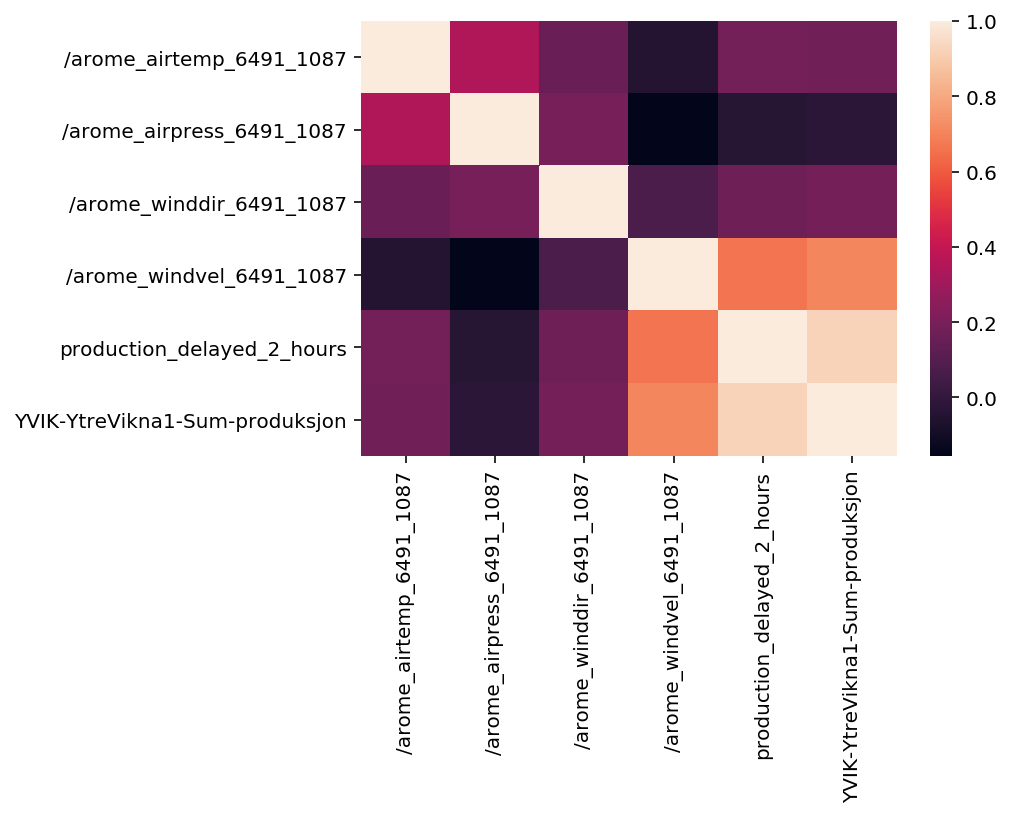

In [27]:
# Ser etter korrelasjoner mellom variablene
sns.heatmap(cleaned_dataframe.corr())

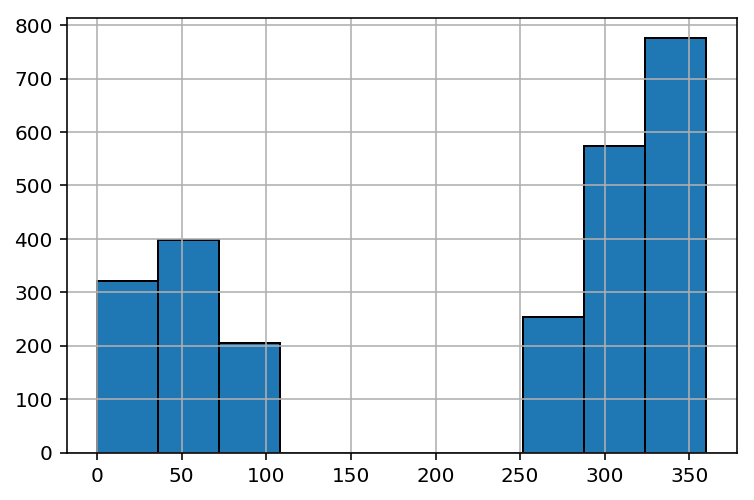

In [16]:
# Noe veldig rart med kollonen for vindrettning

cleaned_dataframe['/arome_winddir_6491_1087'].hist()

#### Dele datasett i et X og Y-datasett

In [28]:
x = cleaned_dataframe[['/arome_airtemp_6491_1087', '/arome_airpress_6491_1087','/arome_winddir_6491_1087', '/arome_windvel_6491_1087','production_delayed_2_hours' ]]
y = cleaned_dataframe['YVIK-YtreVikna1-Sum-produksjon']

#### Train test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#### Lage og trene modellen

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Undersøke koefsientene i modellen

In [35]:
# Prine ut coefisienter
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

# Ser at  

,Coefficient
/arome_airtemp_6491_1087,0.142368
/arome_airpress_6491_1087,0.015261
/arome_winddir_6491_1087,0.003471
/arome_windvel_6491_1087,0.551968
production_delayed_2_hours,0.788359


#### Predikere de utelatte verdiene (test data)

In [36]:
predictions = lm.predict(X_test)

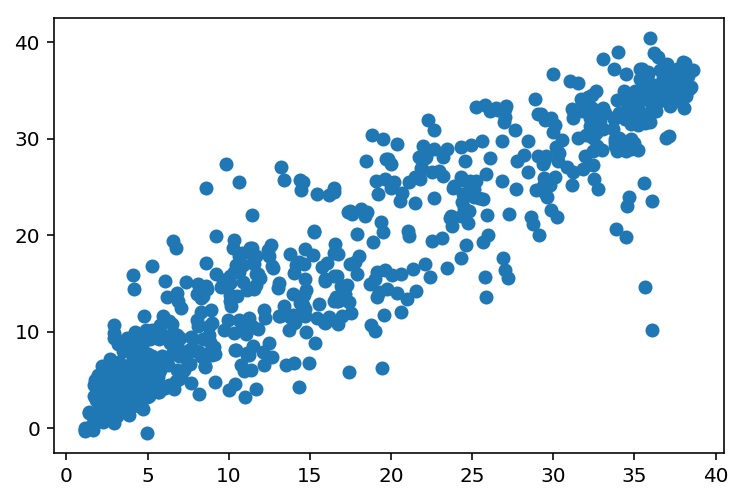

In [37]:
# Burde følge en rett linje

plt.scatter(y_test,predictions)

Text(0.5,1,'Visualisering av nøyaktigheten av lineær regresjons modell')

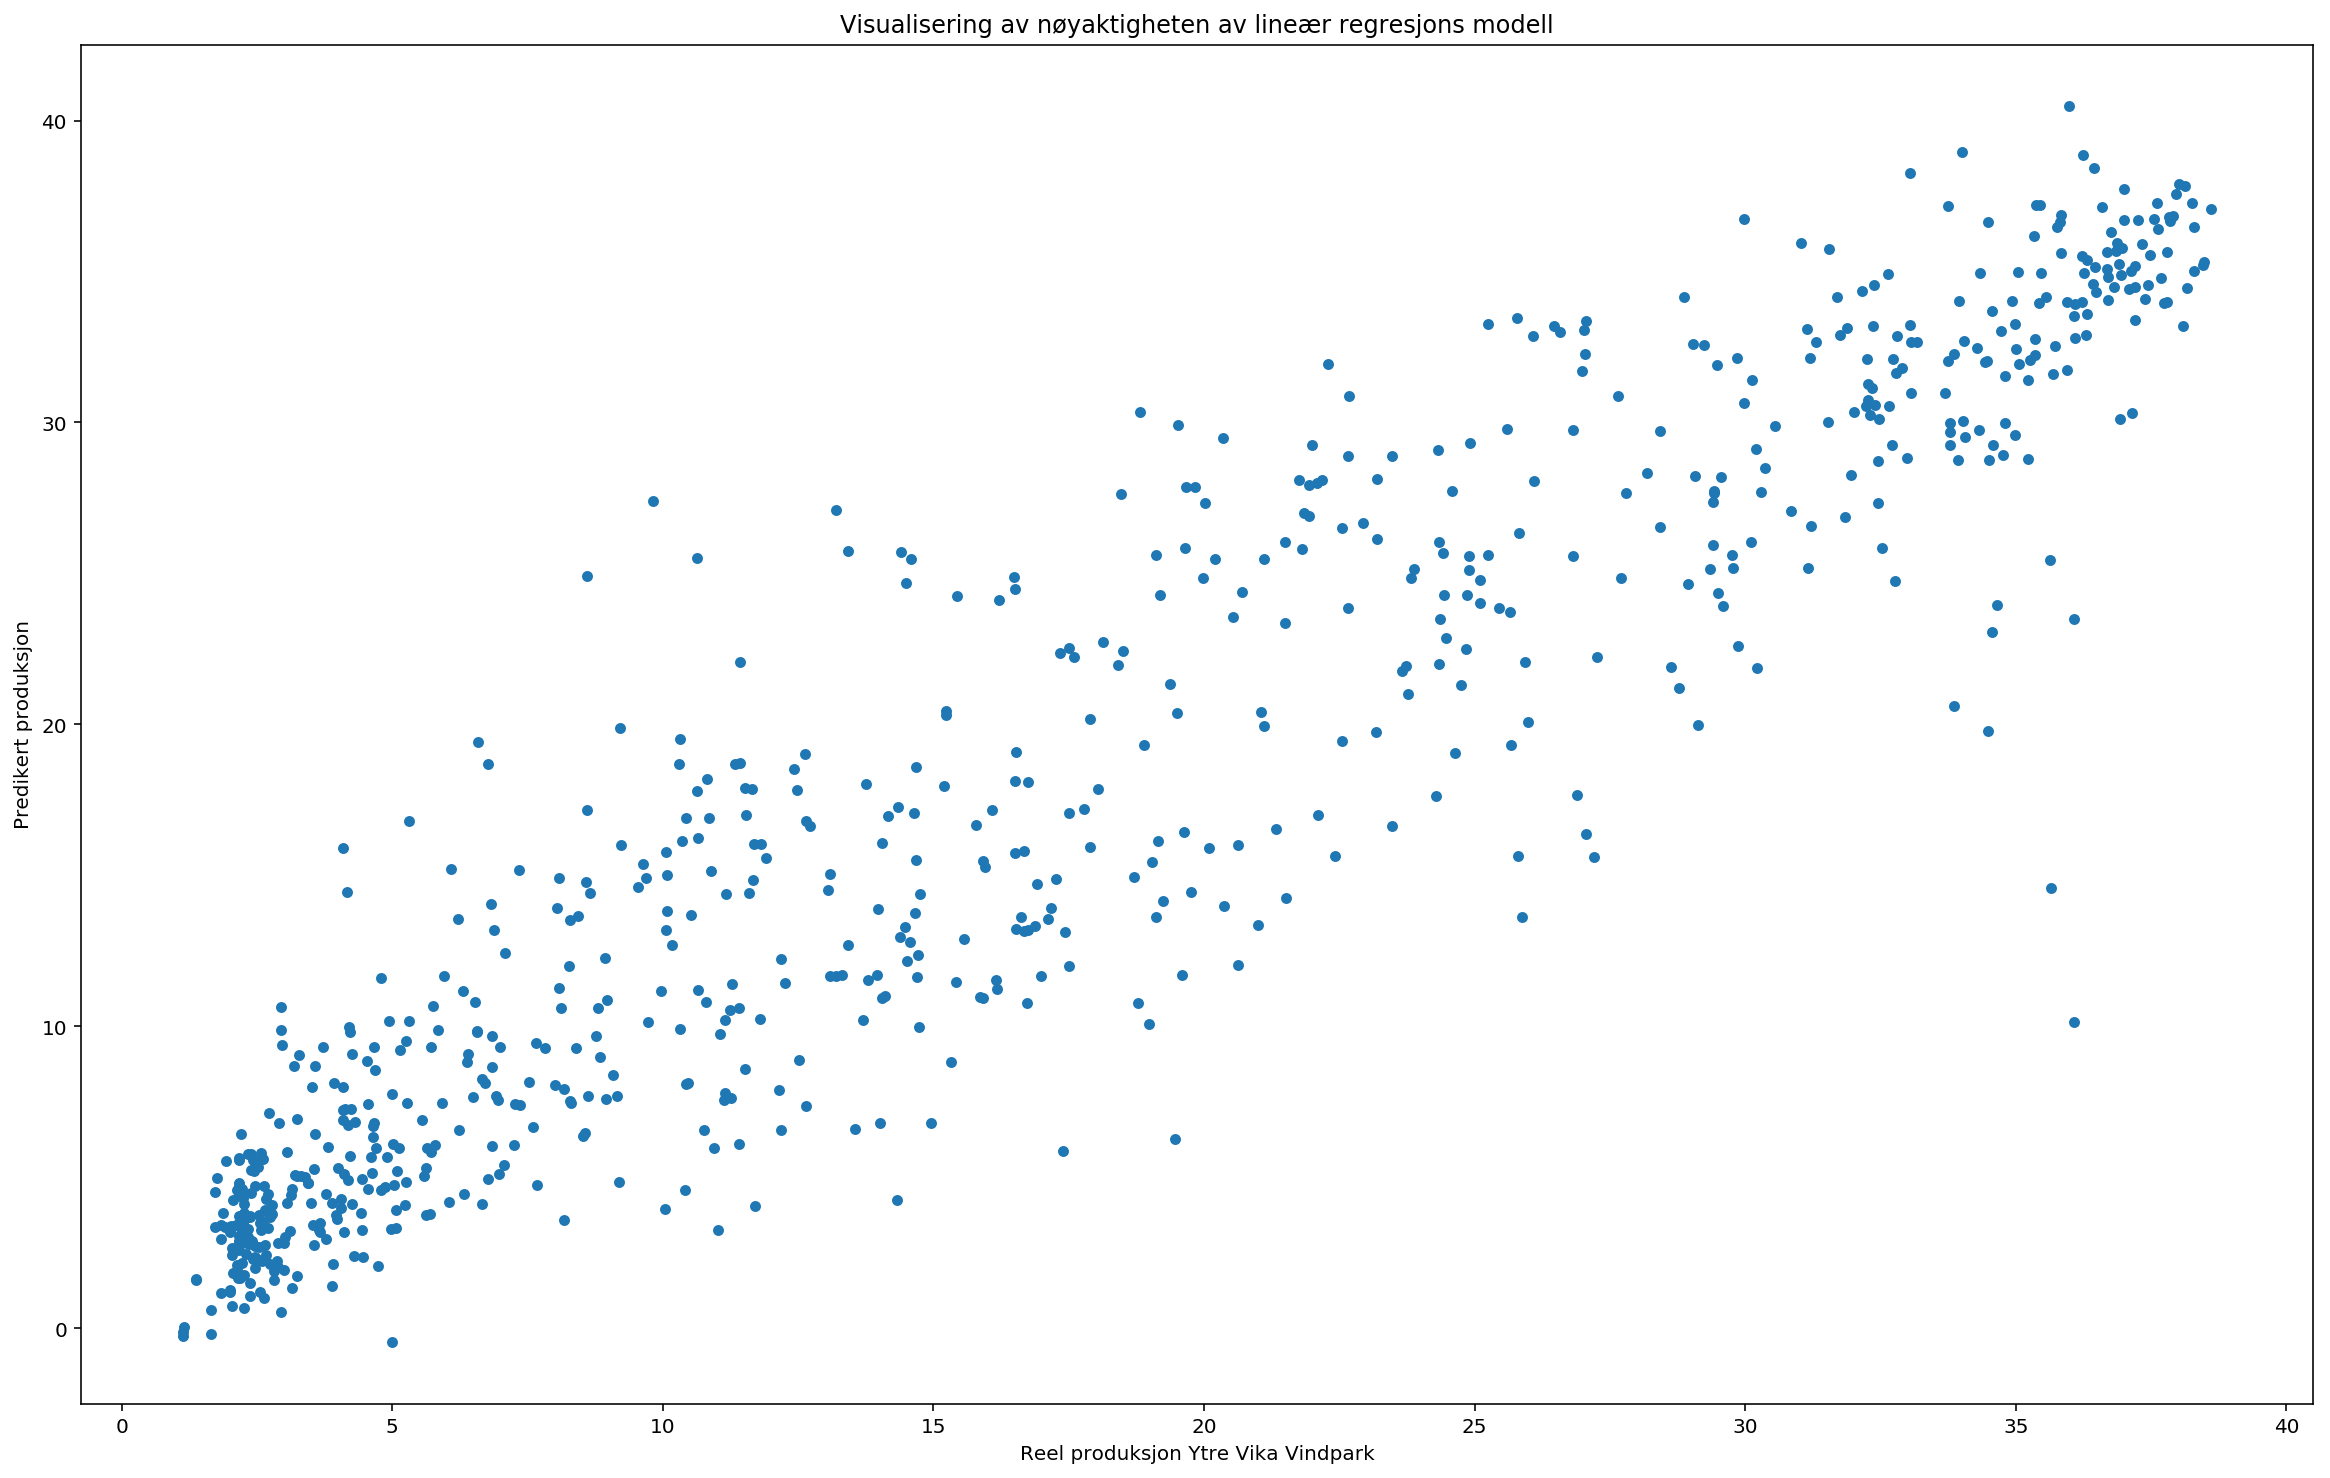

In [38]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,predictions, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av lineær regresjons modell')

#### Kartlegge hvordan modellen gjør det

In [39]:
from sklearn import metrics

In [40]:
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 			 3.26737936838
Mean Squared Error: 			 19.862183196
Root Mean Squared Error: 		 4.45670093186


## Konklusjon

Den lineære modellen i versjon 2.0 er betydelig bedre enn første versjon. Feilprediskjonen begynner å næreme seg eksiterende modell (2 timers forsinkelse). Modellen er bedre på de store avikene, men gjennomsnittet er dårligere.

#### Totalvurdering: 

-3.4 % bedre en dagens modell på MAE

6.7 % bedre enn dagens modell på RMSE

13.2 % bedre enn dagens modell på MSE